In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.io import wavfile

from scipy.fftpack import fft, ifft, dct, idct

import pywt

%matplotlib inline

# Haar

In [2]:
def H_haar(n):
    h = [np.identity(1)]
    for i in range(n):
        temp1 = np.kron(h[-1],np.array([1,1]))
        temp2 = (2**(i/2))*np.kron(np.identity(2**i), np.array([1,-1]))
        h.append(np.vstack([temp1,temp2]))
    return h[-1]/(2**n)**0.5

In [3]:
def Haar(x):
    N = len(x)
    n = int(np.log2(N))
    H = H_haar(n)
    return H.dot(x.reshape(-1,1))

def IHaar(x):
    N = len(x)
    n = int(np.log2(N))
    H = H_haar(n)
    return H.T.dot(x.reshape(-1,1))

In [4]:
def haar(x):
    out = []
    (ca, cd) = pywt.dwt(x,'haar')
    out = list(cd)+out
    while len(ca)!=1:
        (ca, cd) = pywt.dwt(ca,'haar')
        out = list(cd)+out
    out = list(ca)+out
    return out

def ihaar(x):
    N = len(x)
    i = 0
    x[:2] = pywt.idwt([x[0]], [x[1]],'haar')
    i = 2
    while 2*i<N+1:
        try:
            x[:2*i] = pywt.idwt(x[:i],x[i:2*i],'haar')
        except:
            print(i)
            return
        i = 2*i
    return x

# Modified

In [5]:
def X_DFT(x, L):
    N = len(x)
    X = fft(x).reshape(-1,1)
    return np.asarray([0 if k in range(int(np.ceil((N+1-L)/2)), (N-1+L)//2+1) else X[k][0] for k in range(N)]).reshape(-1,)

def X_DCT(x, L):
    N = len(x)
    X = dct(x)
    return np.asarray([0 if k>=N-L else X[k] for k in range(N)]).reshape(-1,)

def X_Haar(x, L):
    N = len(x)
    X = haar(x)
    return np.asarray([0 if k>=N-L else X[k] for k in range(N)]).reshape(-1,)

# Error

In [6]:
def e_DFT(x,l):
    X = X_DFT(x, l)
    x_e = ifft(X)
    mse = np.mean(abs(x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

def e_DCT(x,l):
    N = len(x)
    X = X_DCT(x, l)
    x_e = idct(X)/(2*N)
    mse = np.mean((x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

def e_Haar(x,l):
    X = X_Haar(x, l)
    x_e = ihaar(X)
    mse = np.mean((x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

# Error plot

In [12]:
def error_transfrom(l_range, x, scale = 10):
    #x = np.random.randint(x_max,size = N)
    er_dft = [e_DFT(x, l)for l in tqdm(l_range)]
    er_dct = [e_DCT(x, l) for l in tqdm(l_range)]
    er_haar = [e_Haar(x, l) for l in tqdm(l_range)]
    plt.plot(l_range, er_dft, 'blue')
    plt.plot(l_range, er_dct, 'green')
    plt.plot(l_range, er_haar, 'brown')
    plt.legend(['DFT', 'DCT', 'Haar'])

In [8]:
fs, sound = wavfile.read('sound_1s.wav')

/home/user/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [9]:
n = np.log2(len(sound))
if int(n) != n:
    N = int(n)
    new_sound = list(sound)+[0]*((2**(N+1))-len(sound))
sound = np.asarray(new_sound)

100%|██████████| 245/245 [00:07<00:00, 32.03it/s]


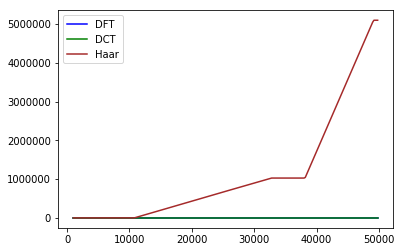

In [11]:
error_transfrom(range(1000,50000, 200),sound)